In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'


0.009098114230000646


In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
house_prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
df1 = house_prices_df[house_prices_df.isna().any(axis=1)]
df1.describe(include='all')

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
#categorical = house_prices_df.select_dtypes(include=['object'])
#for i in categorical:
 #   column = categorical[i]
  #  print(i)
   # print(column.nunique())

In [6]:
house_prices_df[['overallqual', 'yearbuilt', 'yearremodadd', 'totalbsmtsf','firstflrsf', 'grlivarea', 'fullbath', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea']].dropna()

,overallqual,yearbuilt,yearremodadd,totalbsmtsf,firstflrsf,grlivarea,fullbath,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea
0,7,2003,2003,856,856,1710,2,8,0,2003.0,2,548
1,6,1976,1976,1262,1262,1262,2,6,1,1976.0,2,460
2,7,2001,2002,920,920,1786,2,6,1,2001.0,2,608
3,7,1915,1970,756,961,1717,1,7,1,1998.0,3,642
4,8,2000,2000,1145,1145,2198,2,9,1,2000.0,3,836
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,1,1999.0,2,460
1456,6,1978,1988,1542,2073,2073,2,7,2,1978.0,2,500
1457,7,1941,2006,1152,1188,2340,2,9,2,1941.0,1,252
1458,5,1950,1996,1078,1078,1078,1,5,0,1950.0,1,240


In [28]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
X = house_prices_df[['overallqual', 'yearbuilt', 'yearremodadd', 'totalbsmtsf','firstflrsf', 'grlivarea', 'fullbath', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea']]
#for i in range(0, 12):
     #X.drop(X.columns[i], 1, inplace=True)
     #print(X.columns)
Y = house_prices_df['saleprice']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
#print(len(X))
cross_val_score(rf, X, Y, cv=5)

array([0.84397865, 0.77507553, 0.87236381, 0.87987928, 0.8172926 ])

In [8]:
house_prices_df[['overallqual', 'yearbuilt', 'yearremodadd', 'totalbsmtsf','firstflrsf', 'grlivarea', 'fullbath', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea']].describe(include = 'all')

,overallqual,yearbuilt,yearremodadd,totalbsmtsf,firstflrsf,grlivarea,fullbath,fireplaces,garageyrblt,garagecars,garagearea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,0.613014,1978.506164,1.767123,472.980137
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,0.644666,24.689725,0.747315,213.804841
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,0.000000,1900.000000,0.000000,0.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,0.000000,1961.000000,1.000000,334.500000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,1.000000,1980.000000,2.000000,480.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,1.000000,2002.000000,2.000000,576.000000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,3.000000,2010.000000,4.000000,1418.000000


In [9]:
#'overallqual', 'yearbuilt', 'yearremodadd', 'totalbsmtsf','firstflrsf', 'grlivarea', 'fullbath', 'totrmsabvgrd', 'fireplaces', 'garageyrbblt', 'garagecars', 'garagearea')
Y = house_prices_df['saleprice']

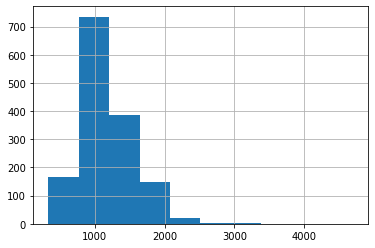

In [10]:
house_prices_df['firstflrsf'].hist()

In [11]:

pd.set_option('max_columns', None)
house_prices_df.corr()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
mssubclass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotfrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
lotarea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
masvnrarea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
bsmtfinsf1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303

In [12]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)


In [13]:
print(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True))

      mszoning_FV  mszoning_RH  mszoning_RL  mszoning_RM
0               0            0            1            0
1               0            0            1            0
2               0            0            1            0
3               0            0            1            0
4               0            0            1            0
...           ...          ...          ...          ...
1455            0            0            1            0
1456            0            0            1            0
1457            0            0            1            0
1458            0            0            1            0
1459            0            0            1            0

[1460 rows x 4 columns]


In [14]:
pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).drop_duplicates()

,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM
0,0,0,1,0
8,0,0,0,1
30,0,0,0,0
47,1,0,0,0
342,0,1,0,0


In [15]:

# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        09:49:34   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
mszoning_FV  2.509e+04   1.37e+04      1.833      0.067   -1761.679    5.19e+04
mszoning_RH  1.342e+04   1.58e+04      0.847      0.397   -1.77e+04    4.45e+04
mszoning_RL  2.857e+04   1.27e+04      2.246      0.025    3612.782    5.35e+04
mszoning_RM  9047.7894   1.29e+04      0.702      0.483   -1.62e+04    3.43e+04
street_Pave   151.0376   1.63e+04      0.009      0.993   -3.18e+04    3.21e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     5.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
'''
R-squared and adjusted R-squared of the model are 0.769 and 0.767 respectively.
F statistic and its associated p-value are 482 and 0.00 respectively.
AIC and BIC of the model are 34970 and 35030 respectively.
According to the R-squared almost 77% of the variance in the target variable is explained by the model. Hence 23% of the variance in the target is not explained. In this sense, there is a large room for improvement.

In order to increase the goodness of fit of our model:

We first log transform the dependent variable. Recall from the checkpoint 2 that the saleprice variable is not normally distributed, so log transforming may help in this regard. To this end, we apply log(1+x) transformation of NumPy.
Second, we create another variable by summing up the basement, first and the second floor areas.
Third, we add the interaction of the total area and the overall quality of the house.'''

'\nR-squared and adjusted R-squared of the model are 0.769 and 0.767 respectively.\nF statistic and its associated p-value are 482 and 0.00 respectively.\nAIC and BIC of the model are 34970 and 35030 respectively.\nAccording to the R-squared almost 77% of the variance in the target variable is explained by the model. Hence 23% of the variance in the target is not explained. In this sense, there is a large room for improvement.\n\nIn order to increase the goodness of fit of our model:\n\nWe first log transform the dependent variable. Recall from the checkpoint 2 that the saleprice variable is not normally distributed, so log transforming may help in this regard. To this end, we apply log(1+x) transformation of NumPy.\nSecond, we create another variable by summing up the basement, first and the second floor areas.\nThird, we add the interaction of the total area and the overall quality of the house.'

In [17]:
house_prices_df['totalsf'] = house_prices_df['totalbsmtsf'] + house_prices_df['firstflrsf'] + house_prices_df['secondflrsf']

house_prices_df['int_over_sf'] = house_prices_df['totalsf'] * house_prices_df['overallqual']

# Y is the target variable
Y = np.log1p(house_prices_df['saleprice'])
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf', 'int_over_sf'] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     651.8
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        09:49:34   Log-Likelihood:                 570.75
No. Observations:                1460   AIC:                            -1117.
Df Residuals:                    1448   BIC:                            -1054.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.8514      0.089    110.698      0.000       9.677      10.026
overallqual     0.1726      0.008     20.699      0.000       0.156       0.189
grlivarea    8.311e-05   1.72e-05      4.839      0.000    4.94e-05       0.000
garagecars      0.0818      0.013      6.307      0.000       0.056       0.107
garagearea   9.684e-05   4.51e-05      2.149      0.032    8.45e-06       0.000
totalsf         0.0003   2.33e-05     11.473      0.000       0.000       0.000
int_over_sf -2.064e-05   2.72e-06     -7.583      0.000    -2.6e-05   -1.53e-05
mszoning_FV     0.4920      0.059      8.344      0.000       0.376       0.608
mszoning_RH     0.3814      0.068      5.597      0.000       0.248       0.515
mszoning_RL     0.4844      0.055      8.845      0.000       0.377       0.592
mszoning_RM     0.3255      0.055      5.876      0.000       0.217       0.434
street_Pave    -0.0010      0.070     -0.014      0.989      -0.138       0.136
==============================================================================
Omnibus:                      489.548   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5085.468
Skew:                          -1.254   Prob(JB):                         0.00
Kurtosis:                      11.793   Cond. No.                     5.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
'''R-squared and adjusted R-squared of the model are 0.832 and 0.831 respectively. These are improvements upon the first model.
F statistic and its associated p-value are 651.8 and 0.00 respectively. This also indicates that the second model is better than the first one.
AIC and BIC of the model are -1117 and -1054 respectively. These values are lower than the ones of the first model. Hence, the second model is better than the first model.
Considering all of the metrics above, our second model has a better goodness of fit than the first model.'''

'R-squared and adjusted R-squared of the model are 0.832 and 0.831 respectively. These are improvements upon the first model.\nF statistic and its associated p-value are 651.8 and 0.00 respectively. This also indicates that the second model is better than the first one.\nAIC and BIC of the model are -1117 and -1054 respectively. These values are lower than the ones of the first model. Hence, the second model is better than the first model.\nConsidering all of the metrics above, our second model has a better goodness of fit than the first model.'

In [40]:
import timeit
code_to_test = """
a = range(100000)
b = []
for i in a:
    b.append(i*2)
"""
elapsed_time = timeit.timeit(code_to_test, number=100)/100
print(elapsed_time)

0.009072677980002481
